In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set a consistent style for the plots
sns.set_style("whitegrid")

In [21]:
# Define the path to the raw data directory
raw_data_path = os.path.join('..', 'data', 'raw')

# Construct the full path for each file
true_file_path = os.path.join(raw_data_path, 'True.csv')
fake_file_path = os.path.join(raw_data_path, 'Fake.csv')

# Load the datasets using the constructed paths
df_true = pd.read_csv(true_file_path)
df_fake = pd.read_csv(fake_file_path)

In [23]:
# Add the 'label' column
df_fake['label'] = 1
df_true['label'] = 0

# Concatenate the two DataFrames into one
df = pd.concat([df_true, df_fake], ignore_index=True)

# Shuffle the DataFrame to mix the records
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Combined and shuffled DataFrame:")
display(df.head())

Combined and shuffled DataFrame:


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1


In [24]:
# Display a concise summary of the DataFrame
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [25]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


label
1    23481
0    21417
Name: count, dtype: int64


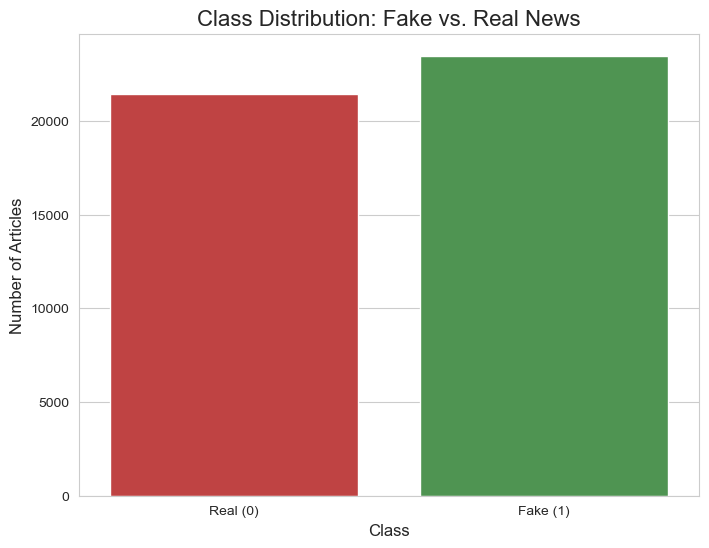

In [27]:
# Get the counts for each class
print(df['label'].value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 6))

# CORRECTED LINE: Assign 'label' to hue and set legend=False
sns.countplot(x='label', data=df, hue='label', palette=['#d32f2f', '#43a047'], legend=False)

plt.title('Class Distribution: Fake vs. Real News', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Real (0)', 'Fake (1)'])
plt.show()

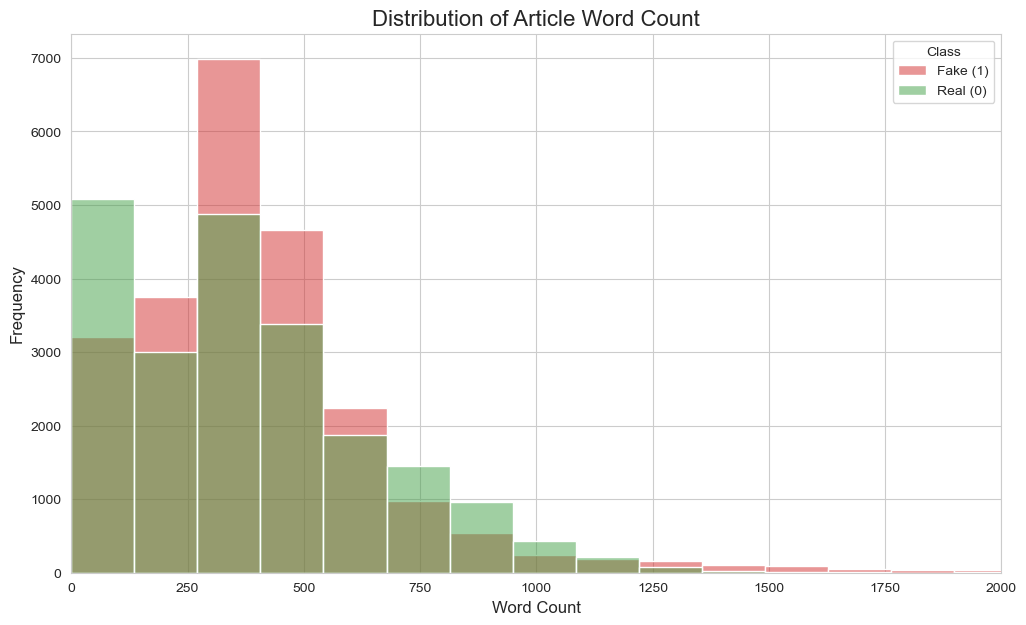

In [28]:
# Create a new column for the word count of the 'text'
df['text_length'] = df['text'].apply(lambda s: len(s.split()))

# Plot the distribution of text length for each class
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='text_length', hue='label', multiple='layer', bins=60, palette=['#43a047', '#d32f2f'])
plt.title('Distribution of Article Word Count', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Class', labels=['Fake (1)', 'Real (0)'])
plt.xlim(0, 2000) # Limiting the x-axis for better visualization
plt.show()